# **Проектная работа**

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание технологии:**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

**Описание данных:**
- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).



# **1. Проведение обзора данных (EDA)**

## 1.1 Подготовка данных

## 1.0 Импорт библиотек, загрузка данных из csv-файлов

In [ ]:
#Загрузка библиотек

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
!pip3 install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
#Загрузка данных

try:
  data_arc = pd.read_csv('data_arc.csv')
  data_bulk = pd.read_csv('data_bulk.csv')
  data_bulk_time = pd.read_csv('data_bulk_time.csv')
  data_gas = pd.read_csv('data_gas.csv')
  data_temp = pd.read_csv('data_temp.csv')
  data_wire = pd.read_csv('data_wire.csv')
  data_wire_time = pd.read_csv('data_wire_time.csv')
except:
    try:
      data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
      data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
      data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
      data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
      data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
      data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
      data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
    except:
        print('Ошибка. Проверьте путь к файлу')

## 1.1 Данные об электродах (data_arc)

In [ ]:
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [ ]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


В данных 14 876 строк, пропуски отсутствуют.

Названия столбцов следует переименовать.

Признаки "Начало нагрева дугой" и "Конец нагрева дугой" необходимо привести к формату даты.

In [ ]:
data_arc.columns = ['key', 'arc_heating_start', 'arc_heating_end', 'active_power', 'reactive_power']

In [ ]:
data_arc['arc_heating_start'] = pd.to_datetime(data_arc['arc_heating_start'])
data_arc['arc_heating_end'] = pd.to_datetime(data_arc['arc_heating_end'])

In [ ]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                14876 non-null  int64         
 1   arc_heating_start  14876 non-null  datetime64[ns]
 2   arc_heating_end    14876 non-null  datetime64[ns]
 3   active_power       14876 non-null  float64       
 4   reactive_power     14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


Названия столбцов и формат изменен.

In [ ]:
data_arc.describe()

,key,active_power,reactive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


В данных имеются высокие максимальные значения (в сравнении с медианой и 75% квартилем). Выделяется отрицательное значение реактивной мощьности (-715).

Посморим, как распределяются мощности нагрева.

array([[<AxesSubplot:title={'center':'active_power'}>,
        <AxesSubplot:title={'center':'reactive_power'}>]], dtype=object)

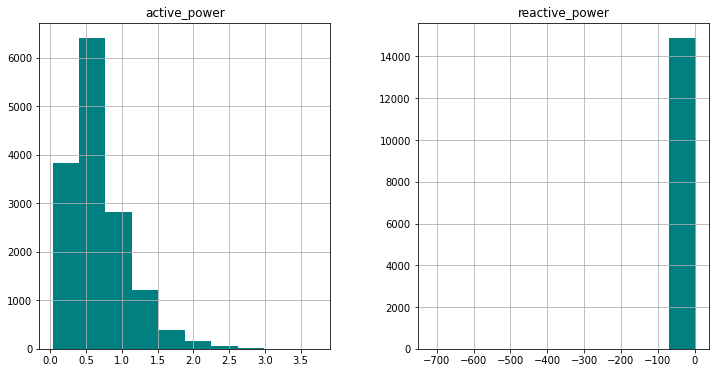

In [ ]:
data_arc[['active_power','reactive_power']].hist(figsize=(12, 6), color ='teal')

Видно, что на распределении реактивной мощности есть выброс (ранее обнаруженное в описательной статистике значение -715)

In [ ]:
data_arc[data_arc['reactive_power'] < 0 ]

,key,arc_heating_start,arc_heating_end,active_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


Во всем датасете есть только одно отрицательное значение реактивной мощности, встречающееся в цикле с номером 2116.

In [ ]:
data_arc[data_arc['key'] == 2116 ]

,key,arc_heating_start,arc_heating_end,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


Заменим это значение рассчитав по пропорции с предыдущим.

In [ ]:
rp_9780 = (data_arc['reactive_power'][9778]/data_arc['active_power'][9778])*data_arc['active_power'][9780]

In [ ]:
rp_9780

0.3503140561224408

In [ ]:
data_arc['reactive_power'][9780] = rp_9780

/tmp/ipykernel_86/1930428223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arc['reactive_power'][9780] = rp_9780


In [ ]:
data_arc['reactive_power'][9780]

0.3503140561224408

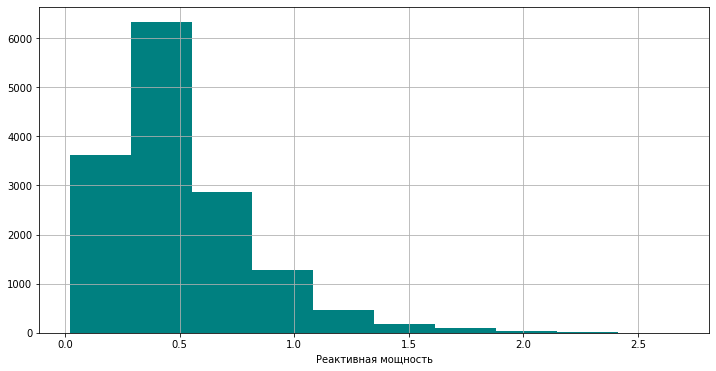

In [ ]:
plt.figure(figsize=(12,6))
data_arc['reactive_power'].hist(figsize=(12, 6), color ='teal')
plt.xlabel('Реактивная мощность')
plt.show()

Посмотрим как распределено количество циклов нагрева.

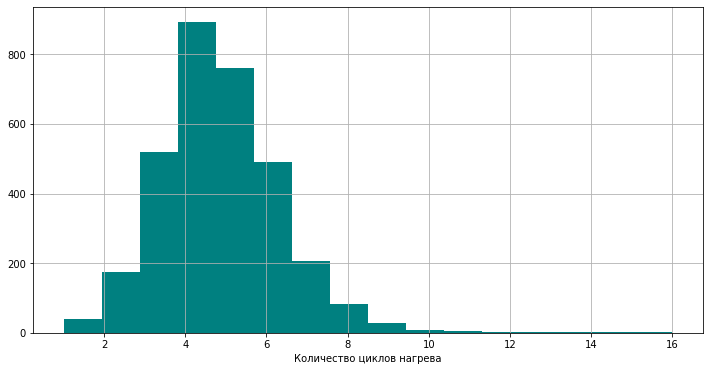

In [ ]:
plt.figure(figsize=(12,6))
data_arc.groupby('key')['active_power'].count().hist(color ='teal', bins=16)
plt.xlabel('Количество циклов нагрева')
plt.show()

Чаще всего в процессе обработки происходит 4-5 нагревов.

## 1.2 Данные о подаче сыпучих материалов (объём и время)

In [ ]:
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [ ]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Заменим пропущенные значения нулями.

In [ ]:
data_bulk = data_bulk.fillna(0)

In [ ]:
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [ ]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [ ]:
data_bulk_time = data_bulk_time.fillna(0)

Данные в таблице необходимо привести к формату даты.

In [ ]:
for i in range(1,16):
  data_bulk_time['Bulk '+str(i)] = pd.to_datetime(data_bulk_time['Bulk '+str(i)])

Обе таблицы содержат одинаковое количество данных. Значения Nan обозначают отсутствие этого сыпучего вещества в конкретной обработке.

In [ ]:
data_bulk_join = data_bulk.join(data_bulk_time, how='inner', rsuffix='_time')
data_bulk_join

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,...,Bulk 6_time,Bulk 7_time,Bulk 8_time,Bulk 9_time,Bulk 10_time,Bulk 11_time,Bulk 12_time,Bulk 13_time,Bulk 14_time,Bulk 15_time
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,...,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:03:52,1970-01-01,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,...,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 11:40:20,1970-01-01,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 12:09:40,1970-01-01,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,...,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 12:41:24,1970-01-01,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,...,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-05-03 13:12:56,1970-01-01,2019-05-03 13:12:56,2019-05-03 13:12:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-08-31 22:46:52,1970-01-01,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-08-31 23:33:09,1970-01-01,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,...,2019-09-01 01:51:58,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2019-09-01 01:39:41,1970-01-01,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,...,2019-09-01 03:12:40,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01 00:00:00,1970-01-01,2019-09-01 02:41:27,2019-09-01 02:41:27


## 1.3 Данные о проволочных материалах (объём и время)

In [ ]:
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [ ]:
data_wire = data_wire.fillna(0)

In [ ]:
data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [ ]:
data_wire_time = data_wire_time.fillna(0)

Данные таблицы аналогичны data_bulk и data_bulk_time.

In [ ]:
for i in range(1,10):
  data_wire_time['Wire '+str(i)] = pd.to_datetime(data_wire_time['Wire '+str(i)])

In [ ]:
data_wire_join = data_wire.join(data_wire_time, how='inner', rsuffix='_time')
data_wire_join

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,key_time,Wire 1_time,Wire 2_time,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019-05-03 11:11:41,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2019-05-03 11:46:10,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2019-05-03 12:13:47,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2019-05-03 12:48:05,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2019-05-03 13:18:15,2019-05-03 13:32:06,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3237,2019-08-31 22:50:20,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
3077,3238,56.128799,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3238,2019-08-31 23:38:24,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
3078,3239,143.357761,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3239,2019-09-01 01:50:43,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
3079,3240,34.070400,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3240,2019-09-01 03:12:02,1970-01-01 00:00:00,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01


 ## 1.4 Данные о продувке сплава газом

In [ ]:
data_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [ ]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [ ]:
data_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Количество строк соответствует количеству обработок, что означает, что на каждую партию была только одна продувка газом.

Стоит переименовать название столбца.

In [ ]:
data_gas.columns = ['key', 'gas']

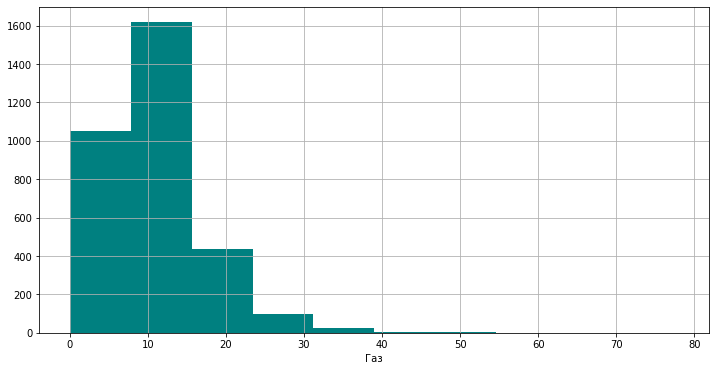

In [ ]:
plt.figure(figsize=(12,6))
data_gas['gas'].hist(figsize=(12, 6), color ='teal')
plt.xlabel('Газ')
plt.show()

Аномальных значений не выявлено.

## 1.5 Результаты измерения температуры (целевой признак)

In [ ]:
data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [ ]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB



Стоит изменить названия столбцов.

Время замера следует привести к формату datetime.

Есть пропуски в значениях температуры (2901).


In [ ]:
data_temp.columns = ['key', 'measurement_time', 'temp']
data_temp['measurement_time'] = pd.to_datetime(data_temp['measurement_time'])

In [ ]:
data_temp.describe()

,key,temp
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


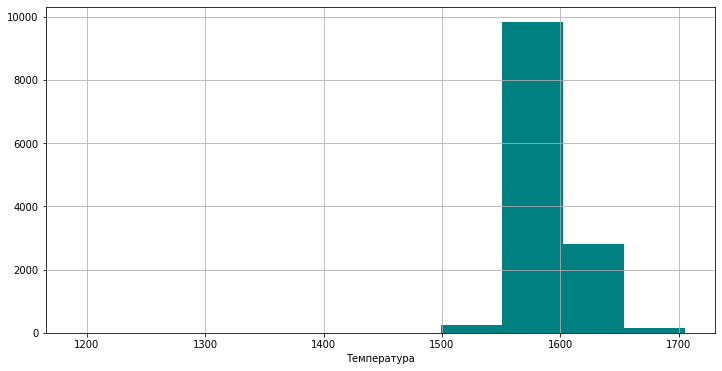

In [ ]:
plt.figure(figsize=(12,6))
data_temp['temp'].hist(figsize=(12, 6), color ='teal')
plt.xlabel('Температура')
plt.show()

Посмотрим, какое количество замеров приходится на каждую обработку.

In [ ]:
data_temp_count = data_temp.groupby('key').count()
data_temp_count

,measurement_time,temp
key,,
1,5,5
2,6,6
3,5,5
4,3,3
5,2,2
...,...,...
3237,5,1
3238,3,1
3239,8,1


У части замеров количество измерений больше количества результатов.

In [ ]:
data_temp_count[data_temp_count['measurement_time'] != data_temp_count['temp']]

,measurement_time,temp
key,,
2500,4,1
2501,5,1
2502,7,1
2503,4,1
2504,3,1
...,...,...
3237,5,1
3238,3,1
3239,8,1


В данных 739 неполных измерений.

In [ ]:
data_temp[data_temp['key'] == 2500]

,key,measurement_time,temp
12267,2500,2019-08-06 03:11:31,1539.0
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN


Необходимо удалить те партии, в которых нет конечной температуры.

## 1.6 Объединение таблиц

Так как нам известно только общее количество засыпаемых добавок в каждой партии, необходимо привести все данные к формату 1 партия - 1 строка.

Посчитаем суммарные значения активной и реактивной мощности в каждой партии. Добавим переменную, которая будет отображать время нагрева

In [ ]:
data_arc['heating_time'] = data_arc['arc_heating_end'] - data_arc['arc_heating_start'] 
data_arc.head()

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,heating_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,0 days 00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0 days 00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0 days 00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,0 days 00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0 days 00:02:28


In [ ]:
data_arc_total = pd.pivot_table(
    data_arc,
    values=['active_power','reactive_power','heating_time'],
    index='key',
    aggfunc={'active_power': np.sum,'reactive_power': np.sum,'heating_time': np.sum})
data_arc_total.columns = ['active_power_total','heating_time','reactive_power_total']
data_arc_total.head()

,active_power_total,heating_time,reactive_power_total
key,,,
1,4.878147,0 days 00:18:18,3.183241
2,3.052598,0 days 00:13:31,1.998112
3,2.525882,0 days 00:10:55,1.599076
4,3.209250,0 days 00:12:21,2.060298
5,3.347173,0 days 00:14:29,2.252643


Посчитаем полную мощность.

In [ ]:
data_arc_total['full_power'] = np.sqrt(
    data_arc_total['active_power_total']**2 + 
    data_arc_total['reactive_power_total']**2)
data_arc_total.head()

,active_power_total,heating_time,reactive_power_total,full_power
key,,,,
1,4.878147,0 days 00:18:18,3.183241,5.824889
2,3.052598,0 days 00:13:31,1.998112,3.648398
3,2.525882,0 days 00:10:55,1.599076,2.989502
4,3.209250,0 days 00:12:21,2.060298,3.813674
5,3.347173,0 days 00:14:29,2.252643,4.034596


Посчитаем полную работу.

In [ ]:
for key in data_arc_total.index:
      data_arc_total['A'] = data_arc_total['full_power'] * data_arc_total["heating_time"].loc[key].seconds
data_arc_total.head()

,active_power_total,heating_time,reactive_power_total,full_power,A
key,,,,,
1,4.878147,0 days 00:18:18,3.183241,5.824889,3838.602151
2,3.052598,0 days 00:13:31,1.998112,3.648398,2404.294122
3,2.525882,0 days 00:10:55,1.599076,2.989502,1970.082119
4,3.209250,0 days 00:12:21,2.060298,3.813674,2513.211440
5,3.347173,0 days 00:14:29,2.252643,4.034596,2658.798725


Полученная переменная содержит в себе все остальные, их можно будет удалить при проверке на мультиколлинеарность.


В данных с температурой оставим только начальную и конечную.

Удалим те партии, в которых неизвестна конечная температура.

In [ ]:
#Таблица с конечными замерами температуры
data_last = pd.pivot_table(
    data_temp,
    values=['measurement_time'],
    index='key',
    aggfunc={'measurement_time': np.max})
data_last.columns = ['measurement_time_max']

#Таблица с начальными замерами температуры
data_first = pd.pivot_table(
    data_temp,
    values=['measurement_time'],
    index='key',
    aggfunc={'measurement_time': np.min})
data_first.columns = ['measurement_time_min']

#Из таблицы с замерами выберем нужные значения
data_temp_last = data_temp[data_temp.measurement_time.isin(data_last['measurement_time_max'])]
data_temp_first = data_temp[data_temp.measurement_time.isin(data_first['measurement_time_min'])]

#Удалим пропуски конечных замеров температуры
data_temp_last = data_temp_last.dropna()

#Объединим таблицы с начальными и конечными замерами температуры
data_temp_good = data_temp_first.merge(data_temp_last, on='key', how='inner')
data_temp_good.columns = ['key', 'measurement_time_first', 'temp_first','measurement_time_last', 'temp_last']

#Оставим в таблице только значения температуры
data_temp_final = data_temp_good[['key', 'temp_first', 'temp_last']]
data_temp_final

,key,temp_first,temp_last
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
...,...,...,...
2472,2495,1570.0,1591.0
2473,2496,1554.0,1591.0
2474,2497,1571.0,1589.0
2475,2498,1591.0,1594.0


В таблицах data_temp_final, data_bulk, data_gas, data_wire преобразуем key в index.

In [ ]:
data_temp_final = data_temp_final.set_index('key')
data_gas = data_gas.set_index('key')
data_bulk = data_bulk.set_index('key')
data_wire = data_wire.set_index('key')

Объединим получившиеся таблицы.

In [ ]:
data = pd.concat([data_arc_total, data_bulk, data_gas, data_wire, data_temp_final],axis=1, sort=False, join='inner')
data.head()

,active_power_total,heating_time,reactive_power_total,full_power,A,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,temp_first,temp_last
key,,,,,,,,,,,,,,,,,,,,,
1,4.878147,0 days 00:18:18,3.183241,5.824889,3838.602151,0.0,0.0,0.0,43.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1571.0,1613.0
2,3.052598,0 days 00:13:31,1.998112,3.648398,2404.294122,0.0,0.0,0.0,73.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1581.0,1602.0
3,2.525882,0 days 00:10:55,1.599076,2.989502,1970.082119,0.0,0.0,0.0,34.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596.0,1599.0
4,3.209250,0 days 00:12:21,2.060298,3.813674,2513.211440,0.0,0.0,0.0,81.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601.0,1625.0
5,3.347173,0 days 00:14:29,2.252643,4.034596,2658.798725,0.0,0.0,0.0,78.0,0.0,...,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,1602.0


In [ ]:
data.shape

(2329, 32)

## 1.7 Исследование итоговой таблицы с данными

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 1 to 2499
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   active_power_total    2329 non-null   float64        
 1   heating_time          2329 non-null   timedelta64[ns]
 2   reactive_power_total  2329 non-null   float64        
 3   full_power            2329 non-null   float64        
 4   A                     2329 non-null   float64        
 5   Bulk 1                2329 non-null   float64        
 6   Bulk 2                2329 non-null   float64        
 7   Bulk 3                2329 non-null   float64        
 8   Bulk 4                2329 non-null   float64        
 9   Bulk 5                2329 non-null   float64        
 10  Bulk 6                2329 non-null   float64        
 11  Bulk 7                2329 non-null   float64        
 12  Bulk 8                2329 non-null   float64        
 13  Bul

Выполним провеку мультиколлинеарности и отсутсвие зависимостей между целевым и остальными признаками.

<AxesSubplot:title={'center':'Попарная корреляция'}>

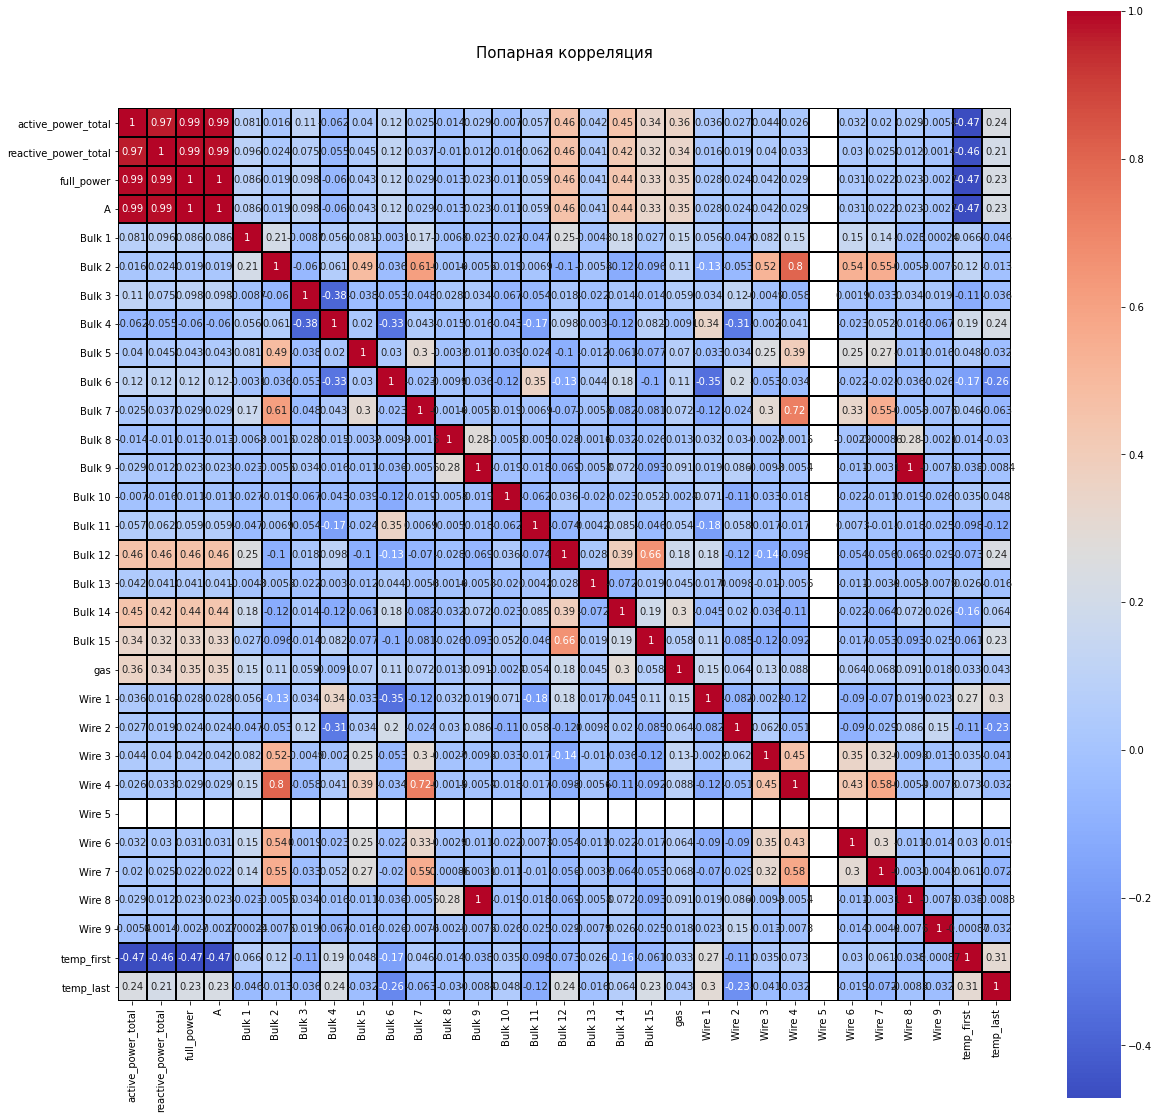

In [ ]:
plt.figure(figsize=(20,20))
plt.title('Попарная корреляция', y = 1.05, size = 15)
sns.heatmap(data.corr(method='spearman'), 
            annot = True,  
            fmt='.2g', 
            cmap = 'coolwarm', 
            square= True, 
            linewidths=1, 
            linecolor='black')

Как и ожидалось, Активная, Реактивная, Полная мощности и Работа связаны (и время нагрева). Оставим только Работу.

Видно, что признаки Wire 8 и Bulk 9 имеют сильную корреляцию. Поэтому один из признаков можно удалить.

Wire 5 полностью пустой, его тоже можно удалить.

In [ ]:
data = data.drop([
    'reactive_power_total', 
    'heating_time', 
    'active_power_total', 
    'full_power', 
    'Wire 5', 
    'Wire 8' ], axis=1)
data.head()

,A,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,...,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 9,temp_first,temp_last
key,,,,,,,,,,,,,,,,,,,,,
1,3838.602151,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,...,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,1571.0,1613.0
2,2404.294122,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,...,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,1581.0,1602.0
3,1970.082119,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,...,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,1596.0,1599.0
4,2513.211440,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,...,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,1601.0,1625.0
5,2658.798725,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,...,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,1576.0,1602.0


Диграммы размаха признаков.

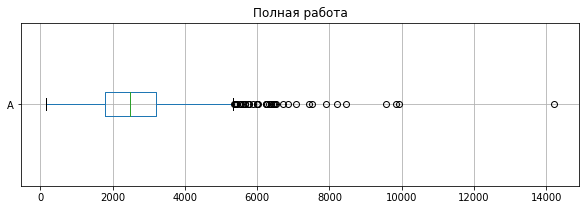

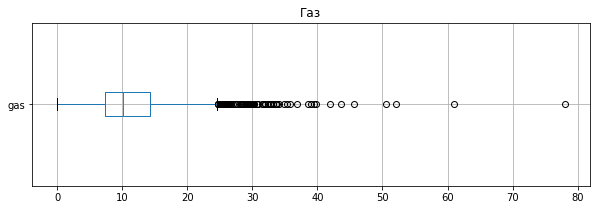

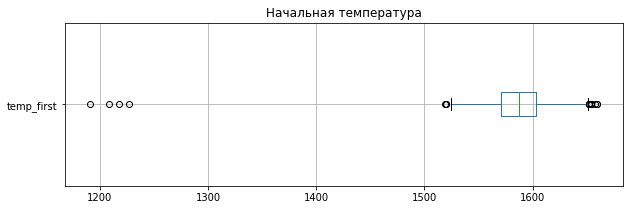

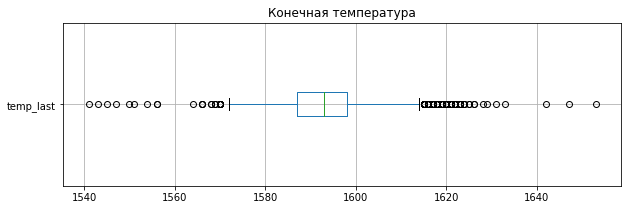

In [ ]:
data[['A']].boxplot(figsize=(10, 3), vert=False)
plt.title('Полная работа')
plt.show()

data[['gas']].boxplot(figsize=(10, 3), vert=False)
plt.title('Газ')
plt.show()

data[['temp_first']].boxplot(figsize=(10, 3), vert=False)
plt.title('Начальная температура')
plt.show()

data[['temp_last']].boxplot(figsize=(10, 3), vert=False)
plt.title('Конечная температура')
plt.show()

In [ ]:
data

,A,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,...,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 9,temp_first,temp_last
key,,,,,,,,,,,,,,,,,,,,,
1,3838.602151,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,...,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,1571.0,1613.0
2,2404.294122,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,...,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,1581.0,1602.0
3,1970.082119,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,...,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,1596.0,1599.0
4,2513.211440,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,...,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,1601.0,1625.0
5,2658.798725,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,...,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,1576.0,1602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2626.245019,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.125735,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,1570.0,1591.0
2496,3331.887940,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,...,9.412616,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,1554.0,1591.0
2497,1901.054342,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,...,6.271699,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,1571.0,1589.0


# **2. Построение модели машинного обучения**

In [ ]:
RANDOM_STATE = 27012023
CV = 5

### 2.1 Подготовка к обучению: разделение данных на обучающую и тестовую выборки, масштабирование.



In [ ]:
#Разделение выборки на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.25, random_state = RANDOM_STATE)

#Масштабирование 
num_features = data.columns.tolist()
num_features = [i for i in num_features if i not in ("temp_last")]
scaler = MinMaxScaler()
scaler.fit(train[num_features])
train[num_features] = scaler.transform(train[num_features])
test[num_features] = scaler.transform(test[num_features])

#Разделение на целевую и остальные признаки
features_train = train.drop(['temp_last'], axis = 1)
target_train = train['temp_last']
features_test = test.drop(['temp_last'], axis = 1)
target_test = test['temp_last']

/tmp/ipykernel_86/2808346008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[num_features] = scaler.transform(train[num_features])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Результаты моделей будем сохранять в список.

In [ ]:
#Cписок для записи результатов кросс валидации разных алгоритмов
itog_val = {}

### 2.2 Обучение модели линейной регрессии

In [ ]:
#Модель Линейная регрессия
model_LR = LinearRegression()
MAE_LR = (cross_val_score(model_LR, 
                          features_train, 
                          target_train, 
                          cv=CV, 
                          scoring='neg_mean_absolute_error').mean() * -1)
#Сохранение результата
itog_val['LinearRegression'] = MAE_LR

print('Средний MAE линейной регрессии на обучающей выборке =', MAE_LR)

Средний MAE линейной регрессии на обучающей выборке = 6.936567479966138


## 2.3 Обучение модели Случайный лес

In [ ]:
#Модель Случайный лес
model_RFR = RandomForestRegressor(random_state=RANDOM_STATE)

#Параметры
RFR_param_grid = {'n_estimators': [x for x in range(50, 600, 50)], 
                 'max_depth': [2, 4, 6], 
                 'criterion':['mse']}

#Подбор лучших параметров
RFR_grid = GridSearchCV(model_RFR, 
                       RFR_param_grid, 
                       cv=CV,
                       scoring='neg_mean_absolute_error')
RFR_grid.fit(features_train, target_train)
RFR_best_params = RFR_grid.best_params_

MAE_RFR = (max(RFR_grid.cv_results_['mean_test_score'])*-1)

#Сохранение результата
itog_val['RandomForestRegressor'] = MAE_RFR

print('MAE для RandomForestRegressor на обучающей выборке =', MAE_RFR)

MAE для RandomForestRegressor на обучающей выборке = 6.295355583267524


### 2.4 Обучение модели градиентного бустинга

In [ ]:
#Модель CatBoostRegressor
model_CAT = CatBoostRegressor(verbose=False, random_state=RANDOM_STATE)

MAE_CAT = (cross_val_score(model_CAT,
                           features_train, 
                           target_train, 
                           cv=CV, 
                           scoring='neg_mean_absolute_error').mean() * -1)

best_params_CAT = CatBoostRegressor(verbose=False, 
                                    random_state=random_state).fit(features_train, 
                                        target_train).get_all_params()

#Сохранение результата
itog_val['CatBoostRegressor'] = MAE_CAT

print('Средний MAE CatBoostRegressor на обучающей выборке =', MAE_CAT)
print()

Средний MAE CatBoostRegressor на обучающей выборке = 6.02269976839265



### 2.5 Обучение модели модели LGBMRegressor

In [ ]:
model_LGBM = LGBMRegressor(random_state=RANDOM_STATE) 
#Параметры
LGBM_params = [{'n_estimators': [250, 400, 500, 650], 
                'learning_rate':[0.01, 0.03, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'random_state':[random_state]}]

#Подбор лучших параметров
LGBM_grid = GridSearchCV(model_LGBM, 
                         LGBM_params,
                         cv=CV, 
                         scoring='neg_mean_absolute_error')
LGBM_grid.fit(features_train, target_train)
LGBM_best_params = LGBM_grid.best_params_

MAE_LGBM = (max(LGBM_grid.cv_results_['mean_test_score'])*-1)

#Сохранение результата
itog_val['LGBMRegressor'] = MAE_LGBM

print('MAE для LGBMRegressor на обучающей выборке =', MAE_LGBM)
print()

MAE для LGBMRegressor на обучающей выборке = 6.083724493223229



### 2.6 Константная модель

In [ ]:
from sklearn.dummy import DummyRegressor

#Обучение DummyRegressor
dummy_rougher = DummyRegressor(strategy="mean").fit(features_train, target_train)
#Получение предсказаний
dummy_predicted = dummy_rougher.predict(features_test)
#Рассчет метрики MAE
dummy_MAE = mean_absolute_error(target_test, dummy_predicted)
#Сохранение результата
itog_val['DummyRegressor'] = dummy_MAE
print('MAE константной модели =', dummy_MAE)

MAE константной модели = 7.924038085582524


Для того, чтобы оценивать "адекватность" построенных моделей, целесообразно сравнить их результаты с константной моделью. 

### 2.7 Выбор лучшей модели по результатам работы на обучающей выборке

In [ ]:
#Результаты моделей

itog_val_table = pd.DataFrame(list(itog_val.items()),columns=['Models', 'MAE_train'])
itog_val_table

,Models,MAE_train
0,LinearRegression,6.936567
1,RandomForestRegressor,6.283334
2,CatBoostRegressor,6.022700
3,LGBMRegressor,6.083724
4,DummyRegressor,7.924038


Все модели на тренировочной выборке показали адекватный результат.

### 2.8 Тестирование модели CatBoostRegressor




In [ ]:
model_CAT = CatBoostRegressor()
model_CAT.set_params(**best_params_CAT)
model_CAT.fit(features_train, target_train)
predict = model_CAT.predict(features_test)
test_MAE_CAT = mean_absolute_error(predict, target_test)
itog_test['CatBoostRegressor'] = test_MAE_CAT
print('MAE для CatBoostRegressor на тестовой выборке =', test_MAE_CAT)

0:	learn: 11.1023432	total: 5.33ms	remaining: 5.33s
1:	learn: 10.9541480	total: 8.28ms	remaining: 4.13s
2:	learn: 10.8077384	total: 13.9ms	remaining: 4.6s
3:	learn: 10.6870555	total: 16.8ms	remaining: 4.17s
4:	learn: 10.5645686	total: 19.9ms	remaining: 3.96s
5:	learn: 10.4570332	total: 23ms	remaining: 3.81s
6:	learn: 10.3511425	total: 26.1ms	remaining: 3.7s
7:	learn: 10.2302198	total: 29.2ms	remaining: 3.62s
8:	learn: 10.1185289	total: 32.4ms	remaining: 3.57s
9:	learn: 10.0221377	total: 35.5ms	remaining: 3.51s
10:	learn: 9.9255701	total: 38.8ms	remaining: 3.48s
11:	learn: 9.8388593	total: 41.9ms	remaining: 3.45s
12:	learn: 9.7455031	total: 44.9ms	remaining: 3.41s
13:	learn: 9.6589692	total: 48ms	remaining: 3.38s
14:	learn: 9.5916756	total: 51.2ms	remaining: 3.36s
15:	learn: 9.5237579	total: 54.4ms	remaining: 3.34s
16:	learn: 9.4550840	total: 57.5ms	remaining: 3.33s
17:	learn: 9.3843350	total: 60.7ms	remaining: 3.31s
18:	learn: 9.3138181	total: 64.3ms	remaining: 3.32s
19:	learn: 9.24095

Анализ значимости признаков в модели CatBoostRegressor

Text(0.5, 0, 'CatBoostRegressor feature importance')

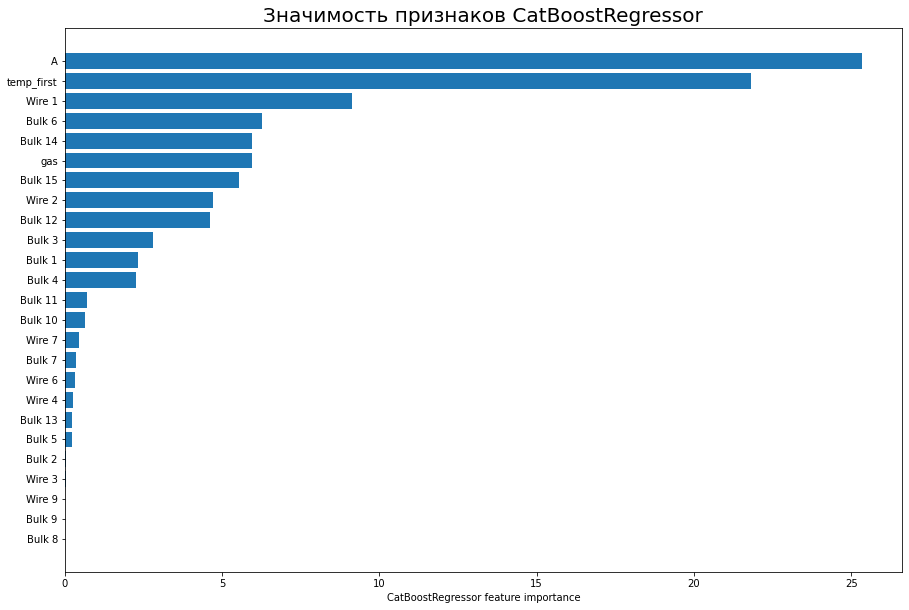

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sorted_idx = model_CAT.feature_importances_.argsort()
plt.barh(features_test.columns.values[sorted_idx], model_CAT.feature_importances_[sorted_idx])
ax.set_title('Значимость признаков CatBoostRegressor', fontsize=20)
plt.xlabel("CatBoostRegressor feature importance")

Для модели наиболее значимыми признаками оказались начальная температура и полная работа (производная от признаков активная/реактивная мощности и время нагрева).

# 3 Итоговый вывод



**В рамках выполнения работы было сделано:**

- Выстроен план работы
- Изучены и подготовлены данные, проведен EDA
- Проведена предобработка данных
- Добавлены новые признаки 
- Осуществлена проверка признаков на мультиколлинеарность, сформирован итоговый датасет
- Созданы обучающая и тестовая выборки, проведено масштабирование данных
- Обучены модели: LinearRegression, RandomForestRegressor, CatBoostRegressor, LGBMRegressor (с поиском лучших гиперпараметров GridSerachCV)


**Вывод**

Лучшей моделью оказалась LGBMRegressor (MAE = 6.211851).

Для моделей наиболее значимыми признаками оказались начальная температура и полная работа (производная от признаков активная/реактивная мощности и время нагрева).


## Отчет

### Введение

С целью получния стали с определенными свойствами, ее подвергают обработке, в процессе которой происходит десульфурация - выведение серы, а также добавляются различные примеси, корректирующие ее состав.
Даная обработка происходит в металлическом ковше вместимостью около 100 тонн, облицованном изнутри огнеупорным кирпичом. Расплавленную сталь заливают в ковш и нагревают до нужной температуры электродами, установленными на крышке ковша.
Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки, откуда готовый продукт выходит в виде заготовок-слябов.

В рамках данного проекта рассматривается возможность предсказания конечной температуры стали в ковше, после добавления необходимых добавок. Это позволит уменьшить электропотребление и тем самым сократить расходы на обработку стали.

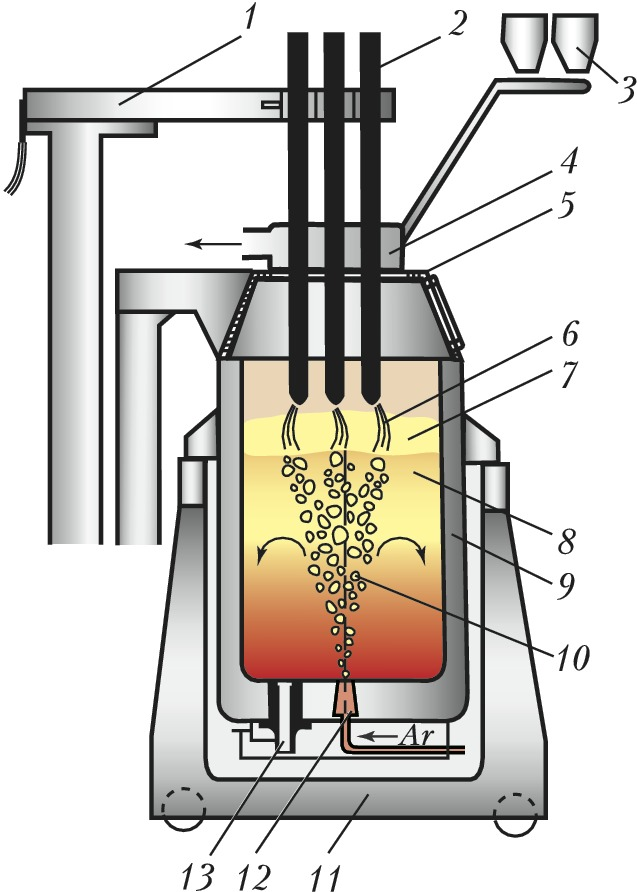


Схема ковша-печи: 1 – токоподвод; 2 – графитированные электроды; 3 – бункеры для ферросплавов; 4 – система удаления технологических газов; 5 – водоохлаждаемый свод (крышка); 6 - электрические дуги; 7 - рафинировочный шлак; 8 - жидкий металл; 9 - футерованный ковш; 10 - газовая продувка; 11 - устройство для транспортирования ковша; 12 - продуваочное устройство; 13 - выпускное отверстие с шиберным затвором.

### Датасет

Исходные данные, полученные от металлургического комбината ООО «Так закаляем сталь» представлены в нескольких таблицах, содержащих информацию об обработке партий стали. По каждой партии известны значения мощностей, время и количество засыпки той или иной добавки, температуры в процессе обработки.

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

### Признаки

В общей сложности известны 55 признаков, почти половина из них - информация о времени совершения того или иного действия.

Часть признаков содержит информацию по каждому циклу в партии, тогда как, например данные об используемом газе представлены общим значением по каждой партии, без информации о количестве и времени продувки.





### Алгоритмы

В ходе подготовки данных стало понятно, что целевым признаком является конечная температура стали в ковше. Исходя из этого была проведена подготовка данных, а именно исключена информация о тех партиях, в которых не известна конечная температура. 

Также, для уменьшения количества признаков и с целью борьбы с мультиколлинеарностью, на основании представленных в данных значений активной и реактивной мощностей, а также времени нагрева, была рассчитана полная работа по всей партии.

Для прогнозирования целевой переменной были использованы модели машинного обучения:

- LinearRegression
- RandomForestRegressor
- CatBoostRegressor
- LGBMRegressor	

В качестве метрики использовалась Средняя абсолютная ошибка (MAE).

Лучший результат на тестовой выборке показала модель CatBoostRegressor (MAE = 6.0227)